In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime

# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

- 아나콘다 프롬프트에서 다음과 같이 입력한다.
- pip install pandas_datareader


In [ ]:
from pandas_datareader import data

In [ ]:
# 시작날짜
start = datetime.datetime(2010, 1, 1)
# 종료날짜
end = datetime.datetime(2020,12, 31)

# Pandas Data Reader를 통해서 Yahoo Finace의 데이터를 가져오기
df = pdr.DataReader('주식 종목코드', 'yahoo',시작날,종료날)
- 데이터 프레임 형태로 불러올 수


In [ ]:
#삼성전자 주식 데이터를 읽어온다.
slb=data.DataReader('035720.KS','yahoo',start,end)
slb

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,14840.0,13820.0,14060.0,14680.0,794880.0,13853.011719
2010-01-05,15060.0,14440.0,14600.0,14800.0,620780.0,13966.250977
2010-01-06,15040.0,14600.0,14920.0,14860.0,362265.0,14022.872070
2010-01-07,14960.0,14420.0,14860.0,14680.0,496205.0,13853.011719
2010-01-08,14700.0,14020.0,14700.0,14580.0,572770.0,13758.645508
...,...,...,...,...,...,...
2020-12-23,77100.0,75400.0,76200.0,75500.0,3149760.0,75469.640625
2020-12-24,76000.0,74400.0,75700.0,74800.0,2325660.0,74769.921875
2020-12-28,75400.0,73900.0,74900.0,74600.0,3232320.0,74570.000000


In [ ]:
#파일로 저장한다
slb.to_csv('data/kk_stock.csv')

### 저장한 정보를 읽어온다.

In [ ]:
#파일에서 데이터를 읽어온다
cel=pd.read_csv('data/kk_stock.csv')

#시계열 데이터는 날짜가 인덱스로 설정되어있는것이 좋음
cel.set_index('Date',inplace=True) #Date를 인덱스로 설정

cel

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,14840.0,13820.0,14060.0,14680.0,794880.0,13853.011719
2010-01-05,15060.0,14440.0,14600.0,14800.0,620780.0,13966.250977
2010-01-06,15040.0,14600.0,14920.0,14860.0,362265.0,14022.872070
2010-01-07,14960.0,14420.0,14860.0,14680.0,496205.0,13853.011719
2010-01-08,14700.0,14020.0,14700.0,14580.0,572770.0,13758.645508
...,...,...,...,...,...,...
2020-12-23,77100.0,75400.0,76200.0,75500.0,3149760.0,75469.640625
2020-12-24,76000.0,74400.0,75700.0,74800.0,2325660.0,74769.921875
2020-12-28,75400.0,73900.0,74900.0,74600.0,3232320.0,74570.000000


In [ ]:
#인덱스의 데이터 타입을 확인 한다.
#dtype을 확인한다.
cel.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
       '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30'],
      dtype='object', name='Date', length=2708)

In [ ]:
# 인덱스를 날짜 타입으로 변경한다.
cel.index = pd.to_datetime(cel.index, format='%Y-%m-%d')
cel.index


DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=2708, freq=None)

In [ ]:
# 컬럼들의 데이터 타입을 확인한다.
cel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2708 entries, 2010-01-04 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2708 non-null   float64
 1   Low        2708 non-null   float64
 2   Open       2708 non-null   float64
 3   Close      2708 non-null   float64
 4   Volume     2708 non-null   float64
 5   Adj Close  2708 non-null   float64
dtypes: float64(6)
memory usage: 148.1+ KB


In [ ]:
#결측치 확인
cel.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

### 일별 수익률 계산

#### 이전 데이터와 값의 차이

cel['Close'] : 종가

In [ ]:
cel['Close'].diff()

Date
2010-01-04       NaN
2010-01-05     120.0
2010-01-06      60.0
2010-01-07    -180.0
2010-01-08    -100.0
               ...  
2020-12-23     300.0
2020-12-24    -700.0
2020-12-28    -200.0
2020-12-29    2300.0
2020-12-30    1000.0
Name: Close, Length: 2708, dtype: float64

#### 이전 보다 몇 퍼센트 정도 등락(-1 ~ 0 ~ 1)

In [ ]:
cel_daily= cel['Close'].pct_change()
cel_daily

Date
2010-01-04         NaN
2010-01-05    0.008174
2010-01-06    0.004054
2010-01-07   -0.012113
2010-01-08   -0.006812
                ...   
2020-12-23    0.003989
2020-12-24   -0.009272
2020-12-28   -0.002674
2020-12-29    0.030831
2020-12-30    0.013004
Name: Close, Length: 2708, dtype: float64

In [ ]:
# 수익률이 0 미만인 데이터의 수를 구한다.
# 주가가 떨어진것
a1 = cel_daily < 0
a1.sum()


1288

- 10년간 주식이 내린 날은 1288일


### 종가에 대한 10%, 90% 위치를 살펴본다.


In [ ]:
#종가만 추출한다.
cel_close=cel['Close']
cel_close

Date
2010-01-04    14680.0
2010-01-05    14800.0
2010-01-06    14860.0
2010-01-07    14680.0
2010-01-08    14580.0
               ...   
2020-12-23    75500.0
2020-12-24    74800.0
2020-12-28    74600.0
2020-12-29    76900.0
2020-12-30    77900.0
Name: Close, Length: 2708, dtype: float64

In [ ]:
# 종가 금액의 요약 통계 정보를 살펴본다.
cel_des = cel_close.describe(percentiles=(0.1,0.9))
cel_des

count     2708.000000
mean     24515.782866
std      12160.870158
min      13100.000000
10%      15660.000000
50%      21890.000000
90%      31400.000000
max      82400.000000
Name: Close, dtype: float64

### 데이터 시각화

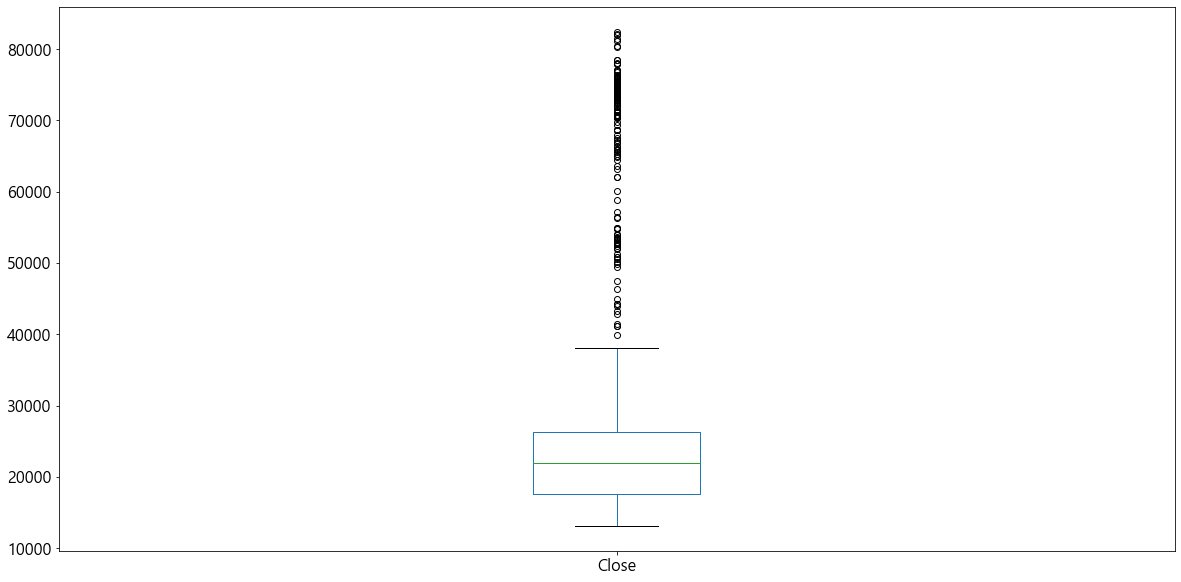

In [ ]:
# 극단치 확인
cel_close.plot.box()
plt.show()


#### 종가 금액에 대한 그래프 색을 검정색으로 해서 그린다.
- x 축은 일자, y 축은 금액으로 처리한다.
- 데이터 프레임이나 시리즈의 인덱스가 x 축이 된다.


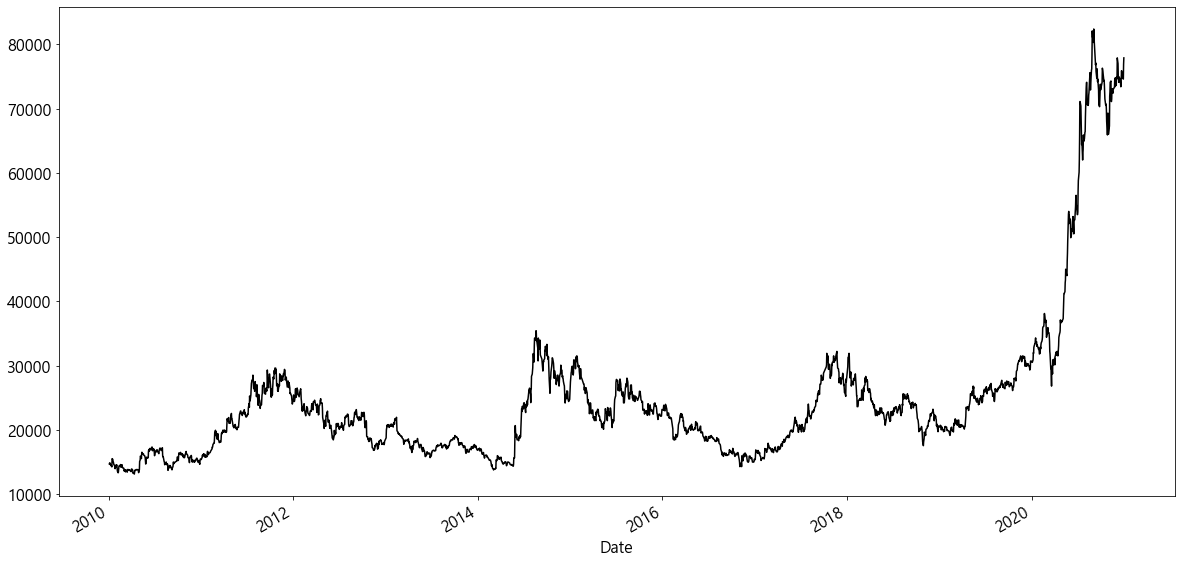

In [ ]:
cel_close.plot(color='black')
plt.show()


#### 특정 범위를 벗어나는 그래프의 색을 다르게 표시한다.
- 하나의 별도 그래프를 그려서 별도의 모양과 색으로 처리한다.


In [ ]:
# 요약통계 정보를 가져온다.
cel_des = cel_close.describe(percentiles=[0.1, 0.9])
cel_des


count     2708.000000
mean     24515.782866
std      12160.870158
min      13100.000000
10%      15660.000000
50%      21890.000000
90%      31400.000000
max      82400.000000
Name: Close, dtype: float64

### 10%, 90%를 이용하한 시각화

- 10% 이하의 값들 요약통계 정보에서 10% 위치 값을 가져온다.

- 10%이하의 값들에 해당하는 것은 True로 되어있는 결과를 가져온다.

In [ ]:
a1=cel_des.loc['10%']
a1

a2=cel_close <= a1 # 10%이하의 값들에 해당하는 것은 True로 되어있는 결과를 가져온다.
a2 

Date
2010-01-04     True
2010-01-05     True
2010-01-06     True
2010-01-07     True
2010-01-08     True
              ...  
2020-12-23    False
2020-12-24    False
2020-12-28    False
2020-12-29    False
2020-12-30    False
Name: Close, Length: 2708, dtype: bool

- 90% 이상의 값들을 요약통계 정보에서 90% 위치 값을 가져온다.

- 90%이상의 값들에 해당하는 것은 True로 되어있는 결과를 가져온다.

In [ ]:
a3=cel_des.loc['90%']
a3

a4=cel_close >= a3 # 90%이상의 값들에 해당하는 것은 True로 되어있는 결과를 가져온
a4

Date
2010-01-04    False
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
              ...  
2020-12-23     True
2020-12-24     True
2020-12-28     True
2020-12-29     True
2020-12-30     True
Name: Close, Length: 2708, dtype: bool

- 위의 두 결과를 합친다. (or 연산을 한다.)
- or : |, 둘 중 하나라도 True면 결과를 True가 된다.
- and : &, 둘 중 하나라도 False면 결과를 False가 된다.

In [ ]:
a5 = a2 | a4
a5.value_counts()


False    2160
True      548
Name: Close, dtype: int64

#### 10%이하, 90%이상인 것들을 가져온다

In [ ]:
cel_top_bottom=cel_close[a5]
cel_top_bottom

Date
2010-01-04    14680.0
2010-01-05    14800.0
2010-01-06    14860.0
2010-01-07    14680.0
2010-01-08    14580.0
               ...   
2020-12-23    75500.0
2020-12-24    74800.0
2020-12-28    74600.0
2020-12-29    76900.0
2020-12-30    77900.0
Name: Close, Length: 548, dtype: float64

# 시각화
- style : 선의 모양. ' ' 를 주면 선의 모양은 빈칸이 된다.
- marker : 값 위치에 표시할 모양, o는 점
- ms : 마커의 크기
- color : 색상

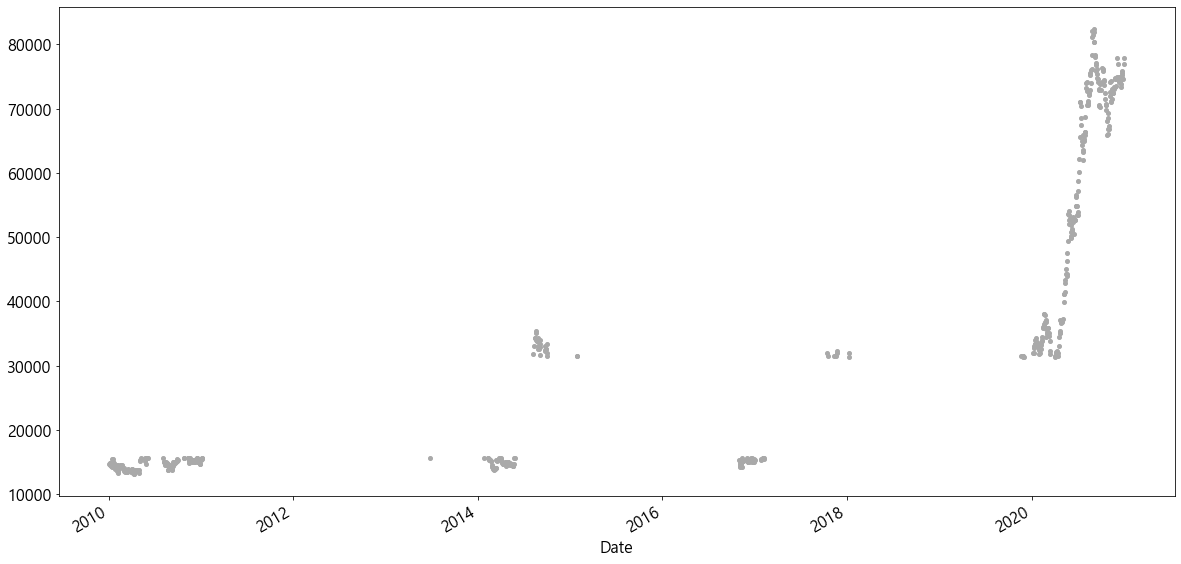

In [ ]:
cel_top_bottom.plot(style=' ', marker='o', ms=4, color='darkgray')
plt.show()


## 그래프 내에 강조 선 그리기
- 상위(90%), 하위(10%) 선을 그린다.


In [ ]:
# 10% 이하의 값들
a1 = cel_close <= cel_des.loc['10%']
# 90% 이상의 값들
a2 = cel_close >= cel_des.loc['90%']

criteria = a1 | a2
criteria


Date
2010-01-04    True
2010-01-05    True
2010-01-06    True
2010-01-07    True
2010-01-08    True
              ... 
2020-12-23    True
2020-12-24    True
2020-12-28    True
2020-12-29    True
2020-12-30    True
Name: Close, Length: 2708, dtype: bool

- 선을 그리기 위해 y 축을 10%, 90%의 위치로 지정하고 x 축은 시작점과
- 종료점으로 셋팅한다.

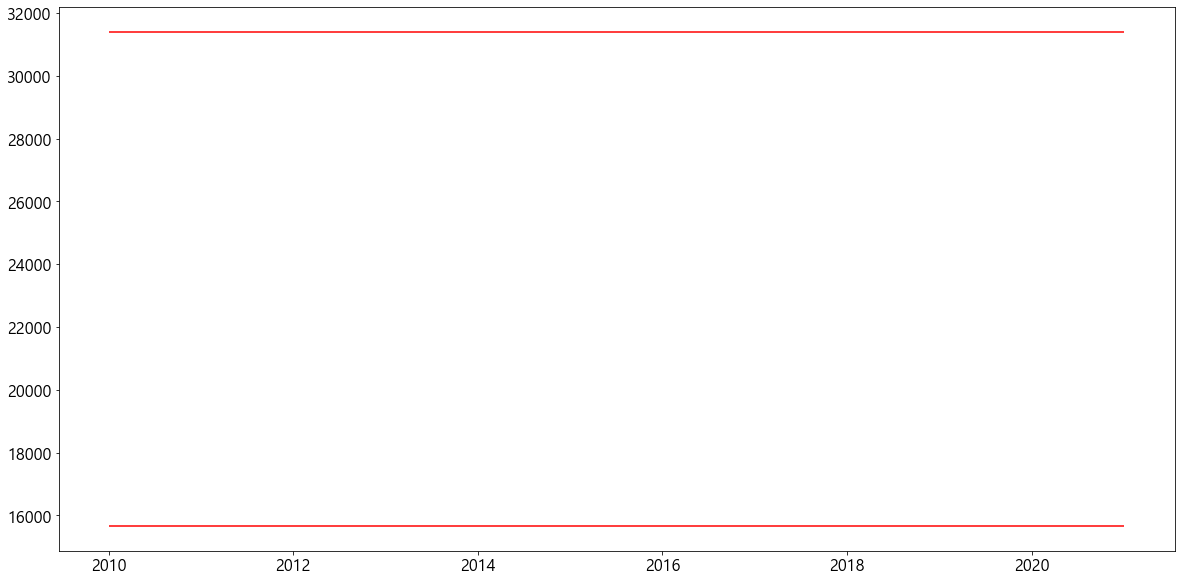

In [ ]:
# 10% 위치값
value_10 = cel_des.loc['10%']
# 90% 위치값
value_90 = cel_des.loc['90%']

# 제일 작은 날짜값
index_min = criteria.index[0]
# 제일 큰 날짜값
index_max = criteria.index[-1]

plt.hlines(y = [value_10, value_90], xmin=index_min, xmax=index_max, 
          color='red')
plt.show()


#### 지금까지 살펴본 3가지 그래프를 한번에 그린다.


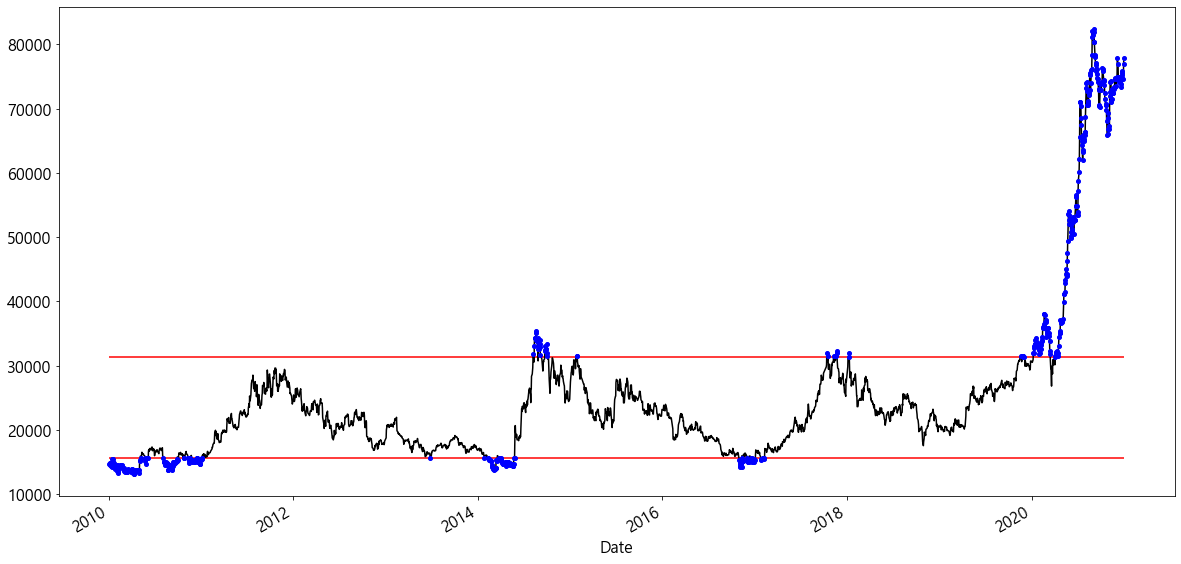

In [ ]:
# 종가 전체 그래프
cel_close.plot(color='black')

# 상위 90% 이상, 하위 10% 이하에 점을 찍는다.
cel_top_bottom.plot(style=' ', marker='o', ms=4, color='blue')

# 상위 90% 위치, 하위 10% 위치에 강조선을 긋는다.
plt.hlines(y = [value_10, value_90], xmin=index_min, xmax=index_max, 
          color='red')
plt.show()

#### pct_change : 현재 원소와 이전 원소간의 % 변화율 계산

In [ ]:
cel_pct_change = cel['Close'].pct_change()
cel_pct_change

Date
2010-01-04         NaN
2010-01-05    0.008174
2010-01-06    0.004054
2010-01-07   -0.012113
2010-01-08   -0.006812
                ...   
2020-12-23    0.003989
2020-12-24   -0.009272
2020-12-28   -0.002674
2020-12-29    0.030831
2020-12-30    0.013004
Name: Close, Length: 2708, dtype: float64

In [ ]:
# 첫 번째 날은 이전 날이 없기 때문에 결과가 결측치로 되어 있다.
cel_pct_change.isna().sum()

1

In [ ]:
# 제거한다.
cel_pct_change.dropna(inplace=True)
cel_pct_change.isna().sum()

0

#### 0을 기준으로 양수: 오른날 음수: 내린날
- 내린날 보다 오른날이 더 많은것을 알 수 있다. 

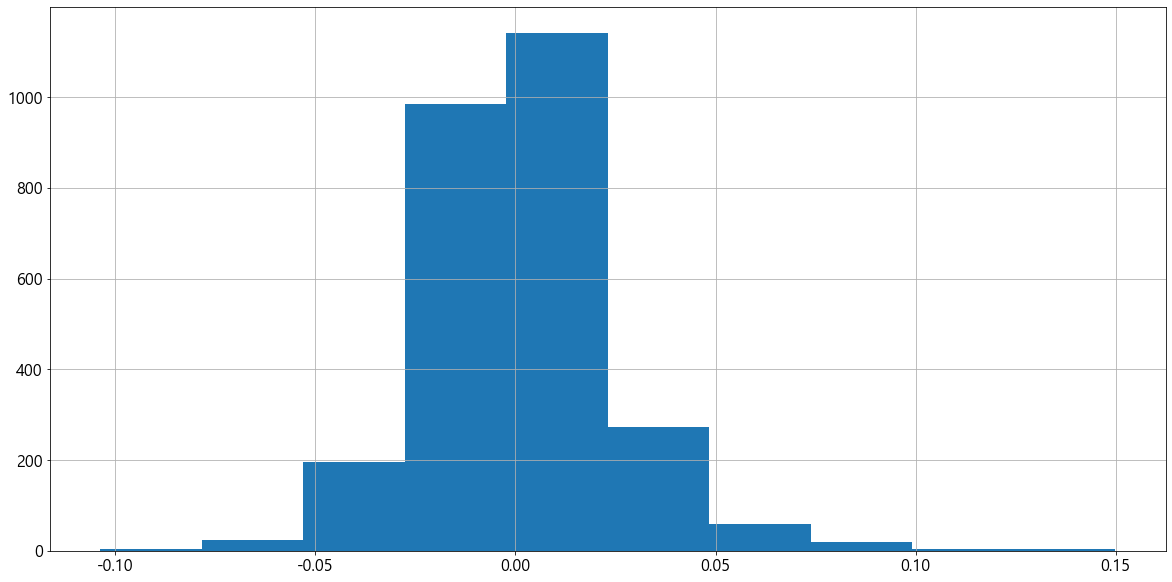

In [ ]:
cel_pct_change.hist()
plt.show()

### 통계량

#### 첨도(Kurtosis)
- 첨도는 분포의 꼬리부분의 길이와 중와 부분의 표족함에 대한 정보를 제공하는 통계량
- 첨도가 0보다 크면 긴 꼬리를 갖고 분포가 중앙 부분에 덜 분포 되어 있는것으로 해석한다


In [ ]:
cel_daily.kurt()


1.5544292402894202